a) visulization

In [4]:
from MNIST_dataloader import *
from matplotlib import pyplot as plt

import os 
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" # avoid kernel shutting down

data_loc = 'Datasets' #change the datalocation to something that works for you
batch_size = 64
    
# get dataloader
train_loader, test_loader = create_dataloaders(data_loc, batch_size)
    
# get some examples
examples = enumerate(test_loader)
batch_idx, (x_clean_example, x_noisy_example, labels_example) = next(examples)
# use these example images througout the assignment as the first 10 correspond to the digits 0-9

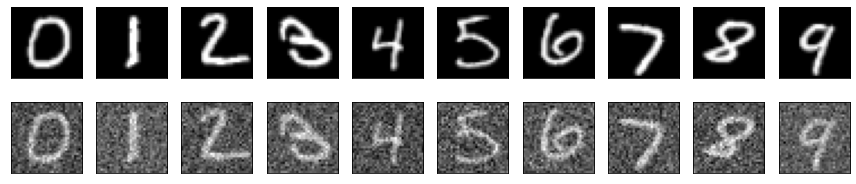

In [5]:
plt.figure(figsize=(12,3))
for i in range(10):
        plt.subplot(2,10,i+1)
        plt.imshow(x_clean_example[i,0,:,:],cmap='gray')
        plt.xticks([])
        plt.yticks([])
        
        plt.subplot(2,10,i+11)
        plt.imshow(x_noisy_example[i,0,:,:],cmap='gray')
        plt.xticks([])
        plt.yticks([])
    
plt.tight_layout()
plt.savefig("data_examples.png",dpi=300,bbox_inches='tight')
plt.show()

In [8]:
print('image size =',x_clean_example.size())
print('batch_idx = ',batch_idx)

image size = torch.Size([64, 1, 32, 32])
batch_idx =  0


b) network

In [4]:
import torch.nn as nn
import torch

dtype = torch.float32

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)


cuda:0


In [3]:
# model construction
class Linear(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(32*32,16*16),
            nn.Linear(16*16,8*8),
            nn.Linear(8*8,4*4),
            nn.Linear(4*4,8*8),
            nn.Linear(8*8,16*16),
            nn.Linear(16*16,32*32)
        )

    def forward(self,x):
        x = self.layer(x)
        return x

def build_model():
    model = Linear()
    model.to(device)
    return model

In [18]:
import torch.optim as optim
import torch.nn.functional as F

# train
def train(model,optimizer,epochs):
    for e in range(epochs):
        for t, (x, y) in enumerate(train_loader):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()   

In [20]:
learning_rate = 1e-2
model = build_model()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

train(model, optimizer, 20)

ValueError: too many values to unpack (expected 2)